<a href="http://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project06%20-%20Text%20Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Document Summarization

The idea of document summarization is a
bit different from keyphrase extraction or topic modeling. In this case, the end result
is still in the form of some document, but with a few sentences based on the length we
might want the summary to be. This is similar to an abstract or an executive summary
in a research paper. The main objective of automated document summarization is
to perform this summarization without involving human input, except for running
computer programs. Mathematical and statistical models help in building and
automating the task of summarizing documents by observing their content and context.

There are two broad approaches to document summarization using automated
techniques. They are described as follows:
- __Extraction-based techniques:__ These methods use mathematical
and statistical concepts like SVD to extract some key subset of the
content from the original document such that this subset of content
contains the core information and acts as the focal point of the entire
document. This content can be words, phrases, or even sentences.
The end result from this approach is a short executive summary of a
couple of lines extracted from the original document. No new content
is generated in this technique, hence the name extraction-based.
- __Abstraction-based techniques:__ These methods are more complex
and sophisticated. They leverage language semantics to create
representations and use natural language generation (NLG)
techniques where the machine uses knowledge bases and semantic
representations to generate text on its own and create summaries
just like a human would write them. Thanks to deep learning, we can
implement these techniques easily but they require a lot of data and
compute.

We will cover extraction based methods here due to constraints of needed a lot of data + compute for abstraction based methods. But you can leverage the seq2seq models you learnt in language translation on an appropriate dataset to build deep learning based abstractive summarizers

# Install necessary dependencies

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Get Text Document

We use the description of a very popular role-playing game (RPG) Skyrim from
Bethesda Softworks for summarization. 

In [22]:
DOCUMENT = """coronaviruses are a type of virus. There are many different kinds, and some cause disease. A coronavirus identified in 2019, SARS-CoV-2, has caused a pandemic of respiratory illness, called COVID-19.As of now, researchers know that the coronavirus is spread through droplets and virus particles released into the air when an infected person breathes, talks, laughs, sings, coughs or sneezes. Larger droplets may fall to the ground in a few seconds, but tiny infectious particles can linger in the air and accumulate in indoor places, especially where many people are gathered and there is poor ventilation.
 This is why mask-wearing, hand hygiene and physical distancing are essential to preventing COVID-19.The first case of COVID-19 was reported Dec. 1, 2019, and the cause was a then-new coronavirus later named SARS-CoV-2. SARS-CoV-2 may have originated in an animal and changed (mutated) so it could cause illness in humans. In the past, several infectious disease outbreaks have been traced to viruses originating in birds, pigs, bats and other animals that mutated to become dangerous to humans. Research continues, and more study may reveal how and why the coronavirus evolved to cause pandemic disease.
 Symptoms show up in people within two to 14 days of exposure to the virus. A person infected with the coronavirus is contagious to others for up to two days before symptoms appear, and they remain contagious to others for 10 to 20 days, depending upon their immune system and the severity of their illness.COVID-19 symptoms include:

Cough
Fever or chills
Shortness of breath or difficulty breathing
Muscle or body aches
Sore throat
New loss of taste or smell
Diarrhea
Headache
New fatigue
Nausea or vomiting
Congestion or runny nose
Some people infected with the coronavirus have mild COVID-19 illness, and others have no symptoms at all. In some cases, however, COVID-19 can lead to respiratory failure, lasting lung and heart muscle damage, nervous system problems, kidney failure or death.
If you have a fever or any of the symptoms listed above, call your doctor or a health care provider and explain your symptoms over the phone before going to the doctor’s office, urgent care facility or emergency room. Here are suggestions if you feel sick and are concerned you might have COVID-19.
COVID-19 is diagnosed through a laboratory test. Diagnosis by examination alone is difficult since many COVID-19 signs and symptoms can be caused by other illnesses. Some people with the coronavirus do not have symptoms at all.
Treatment for COVID-19 addresses the signs and symptoms of the infection and supports people with more severe disease. For mild cases of coronavirus disease, your doctor may recommend measures such as fever reducers or over-the-counter medications. More severe cases may require hospital care, where a patient may receive a combination of treatments that could include steroids, oxygen, mechanical breathing support and other COVID-19 treatments in development. Infusions of monoclonal antibodies given to certain patients early in the infection may reduce the symptoms, severity and duration of the illness.
Yes, severe COVID-19 can be fatal. For updates of coronavirus infections, deaths and vaccinations worldwide, see the Coronavirus COVID-19 Global Cases map developed by the Johns Hopkins Center for Systems Science and Engineering.

Coronaviruses are named for their appearance: “corona” means “crown.” The virus’s outer layers are covered with spike proteins that surround them like a crown.SARS stands for severe acute respiratory syndrome. In 2003, an outbreak of SARS affected people in several countries before ending in 2004. The coronavirus that causes COVID-19 is similar to the one that caused the 2003 SARS outbreak.

Since the 2019 coronavirus is related to the original coronavirus that caused SARS and can also cause severe acute respiratory syndrome, there is “SARS” in its name: SARS-CoV-2. Much is still unknown about these viruses, but SARS-CoV-2 spreads faster and farther than the 2003 SARS-CoV-1 virus. This is likely because of how easily it is transmitted person to person, even from asymptomatic carriers of the virus.Yes, there are different variants of this coronavirus. Like other viruses, the coronavirus that causes COVID-19 can change (mutate). In December 2020, B.1.1.7, a new variant, was identified in the United Kingdom, and since then, variants have appeared in other locations around the world, including B.1.351, first isolated in South Africa, and others. Mutations may enable the coronavirus to spread faster from person to person, and may cause more severe disease. More infections can result in more people getting very sick and also create more opportunity for the virus to develop further mutations.
"""

In [23]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

# Summarization with Gensim

Let’s look at an implementation of document summarization by leveraging Gensim’s
summarization module. It is pretty straightforward.

In [24]:
from gensim.summarization import summarize

print(summarize(DOCUMENT, ratio=0.2, split=False))

A coronavirus identified in 2019, SARS-CoV-2, has caused a pandemic of respiratory illness, called COVID-19.As of now, researchers know that the coronavirus is spread through droplets and virus particles released into the air when an infected person breathes, talks, laughs, sings, coughs or sneezes.
SARS-CoV-2 may have originated in an animal and changed (mutated) so it could cause illness in humans.
A person infected with the coronavirus is contagious to others for up to two days before symptoms appear, and they remain contagious to others for 10 to 20 days, depending upon their immune system and the severity of their illness.COVID-19 symptoms include: Cough Fever or chills Shortness of breath or difficulty breathing Muscle or body aches Sore throat New loss of taste or smell Diarrhea Headache New fatigue Nausea or vomiting Congestion or runny nose Some people infected with the coronavirus have mild COVID-19 illness, and others have no symptoms at all.
Treatment for COVID-19 addresses

In [25]:
print(summarize(DOCUMENT, word_count=75, split=False))

A coronavirus identified in 2019, SARS-CoV-2, has caused a pandemic of respiratory illness, called COVID-19.As of now, researchers know that the coronavirus is spread through droplets and virus particles released into the air when an infected person breathes, talks, laughs, sings, coughs or sneezes.
Treatment for COVID-19 addresses the signs and symptoms of the infection and supports people with more severe disease.
Mutations may enable the coronavirus to spread faster from person to person, and may cause more severe disease.


In [26]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

32

This summarization implementation from Gensim is based on a variation of
a popular algorithm called TextRank. 

# Basic Text pre-processing

In [27]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['coronaviruses type virus', 'many different kinds cause disease',
       'coronavirus identified sarscov caused pandemic respiratory illness called covidas researchers know coronavirus spread droplets virus particles released air infected person breathes talks laughs sings coughs sneezes'],
      dtype='<U407')

# Text Representation with Feature Engineering

We will be vectorizing our normalized sentences using the TF-IDF feature engineering
scheme. We keep things simple and don’t filter out any words based on document
frequency. But feel free to try that out and maybe even leverage n-grams as features.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(281, 32)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
accumulate,0.0,0.0,0.0,0.24,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
aches,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.13,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
acute,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.21,0.00,0.0,0.25,0.0,0.0,0.0,0.00,0.0,0.0
addresses,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.39,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
affected,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.42,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
africa,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.25,0.0,0.0
air,0.0,0.0,0.2,0.21,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
alone,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.35,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
also,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.25,0.0,0.0,0.0,0.00,0.0,0.3
animal,0.0,0.0,0.0,0.00,0.0,0.37,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0


# Latent Semantic Analysis

Here, we summarize our game description by utilizing document sentences. The
terms in each sentence of the document have been extracted to form the term-document matrix, which we observed in the previous cell. 

We apply low-rank Singular Value Decomposition to this matrix. The core principle behind Latent Semantic Analysis (LSA) is that in any document, there exists a latent structure among terms that are related
contextually and hence should also be correlated in the same singular space.

The main idea in our implementation is to use SVD (recall M = USVT) so that U
and V are the orthogonal matrices and S is the diagonal matrix, which can also be
represented as a vector of the singular values. 

The original matrix can be represented as
a term-document matrix where the rows are terms and each column is a document, i.e.,
a sentence from our document in this case. The values can be any type of weighting like
Bag of Words model-based frequencies, TF-IDFs, or binary occurrences.

![](https://i.imgur.com/YtopNr3.png)

In [29]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [30]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(281, 3) (3,) (3, 32)


In [31]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [32]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([0.11348978, 0.44531554, 0.4021708 , 0.23756049, 0.29954116,
       0.48245859, 0.20870657, 0.52951637, 0.62341143, 0.53362203,
       0.13122933, 0.38377585, 0.17513233, 0.1946512 , 0.35763233,
       0.7548632 , 0.53007674, 0.39557111, 0.30740027, 0.35564197,
       0.26730856, 0.25780765, 0.26440005, 0.44086094, 0.71430503,
       0.64056528, 0.23948274, 0.34131334, 0.48129078, 0.08825606,
       0.6907127 , 0.25507288])

In [33]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [34]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Research continues, and more study may reveal how and why the coronavirus evolved to cause pandemic disease.
Symptoms show up in people within two to 14 days of exposure to the virus.
A person infected with the coronavirus is contagious to others for up to two days before symptoms appear, and they remain contagious to others for 10 to 20 days, depending upon their immune system and the severity of their illness.COVID-19 symptoms include: Cough Fever or chills Shortness of breath or difficulty breathing Muscle or body aches Sore throat New loss of taste or smell Diarrhea Headache New fatigue Nausea or vomiting Congestion or runny nose Some people infected with the coronavirus have mild COVID-19 illness, and others have no symptoms at all.
Some people with the coronavirus do not have symptoms at all.
Treatment for COVID-19 addresses the signs and symptoms of the infection and supports people with more severe disease.
The coronavirus that causes COVID-19 is similar to the one that caused 

# TextRank

The TextRank summarization algorithm internally uses the popular PageRank
algorithm, which is used by Google for ranking websites and pages. This is used by the
Google search engine when providing relevant web pages based on search queries. To
understand TextRank better, we need to understand some of the concepts surrounding
PageRank. The core algorithm in PageRank is a graph-based scoring or ranking
algorithm, where pages are scored or ranked based on their importance. 

Websites and
pages contain further links embedded in them which link to more pages having more
links and this continues across the Internet. This can be represented as a graph-based
model where vertices indicate the web pages and edges indicate links among them. This
can be used to form a voting or recommendation system such so when one vertex links
to another one in the graph it is basically casting a vote. 

Vertex importance is decided
not only on the number of votes or edges but also the importance of the vertices that are
connected to it and their importance. 

![](https://i.imgur.com/fMyJjUN.png)

We can see that vertex denoting Page C has a higher score than
Page E even if it has fewer edges compared to Page E, because Page B is an important
page connected to Page C.

For textrank we will follow a similar process leveraging pagerank

![](https://i.imgur.com/kkrzeq7.png)

- Tokenize and extract sentences from the document to be
summarized.
- Decide on the number of sentences, k, that we want in the final
summary
- Build a document-term feature matrix using weights like TF-IDF
or Bag of Words.
- Compute a document similarity matrix by multiplying the matrix
by its transpose.
- Use these documents (sentences in our case) as the vertices and
the similarities between each pair of documents as the weight
or score coefficient we talked about earlier and feed them to the
PageRank algorithm.
- Get the score for each sentence.
- Rank the sentences based on score and return the top k sentences.

# Build Similarity Matrix

In [35]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(32, 32)


array([[1.   , 0.   , 0.073, ..., 0.   , 0.   , 0.11 ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.164, 0.   ],
       [0.073, 0.   , 1.   , ..., 0.043, 0.18 , 0.037],
       ...,
       [0.   , 0.   , 0.043, ..., 1.   , 0.   , 0.   ],
       [0.   , 0.164, 0.18 , ..., 0.   , 1.   , 0.089],
       [0.11 , 0.   , 0.037, ..., 0.   , 0.089, 1.   ]])

# Build Similarity Graph

In [36]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

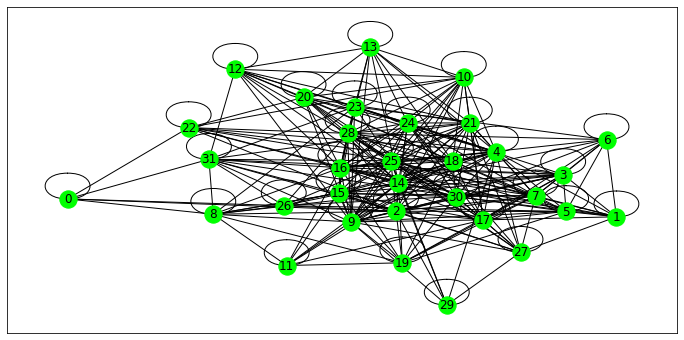

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

# Get Sentence Importance Scores

In [38]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.04748316948462508, 15),
 (0.04424923139555843, 30),
 (0.04293081835367438, 25),
 (0.04055411009731093, 16),
 (0.037201579571463125, 9),
 (0.03699551437754038, 24),
 (0.0369743303959401, 2),
 (0.033906322509520796, 28),
 (0.0333659565913274, 7),
 (0.03268575031606259, 14)]

In [39]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [40]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

A coronavirus identified in 2019, SARS-CoV-2, has caused a pandemic of respiratory illness, called COVID-19.As of now, researchers know that the coronavirus is spread through droplets and virus particles released into the air when an infected person breathes, talks, laughs, sings, coughs or sneezes.
A person infected with the coronavirus is contagious to others for up to two days before symptoms appear, and they remain contagious to others for 10 to 20 days, depending upon their immune system and the severity of their illness.COVID-19 symptoms include: Cough Fever or chills Shortness of breath or difficulty breathing Muscle or body aches Sore throat New loss of taste or smell Diarrhea Headache New fatigue Nausea or vomiting Congestion or runny nose Some people infected with the coronavirus have mild COVID-19 illness, and others have no symptoms at all.
Some people with the coronavirus do not have symptoms at all.
Treatment for COVID-19 addresses the signs and symptoms of the infection 